<a href="https://colab.research.google.com/github/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/notebooks/Week_10/Week_10_Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 10: Deep Generative Models: An Introduction

In [1]:
#@title 
from ipywidgets import widgets
out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id=f"v_ksUIpToGk", width=854, height=480, fs=1, rel=0)
  print("Video available at https://youtube.com/watch?v=" + video.id)
  display(video)
display(out1)

Output()

In [2]:
#@title 
from IPython import display as IPyDisplay
IPyDisplay.HTML(
    f"""
  <div>
    <a href= "https://github.com/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/Slides/Week_10/DL4CV_Week10_Part01.pdf" target="_blank">
    <img src="https://github.com/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/Data/Slides_Logo.png?raw=1"
  alt="button link to Airtable" style="width:200px"></a>
    </div>""" )

## Unsupervised Learning

### Custering

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]

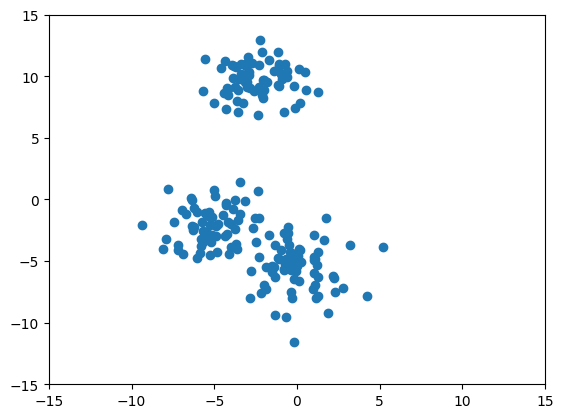

In [5]:
# visualize data
plt.scatter(data[0][:,0], data[0][:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

#### K-means clustering

[[ 0.02908795 -5.54484552]
 [-2.43247424  9.68894613]
 [-5.17095009 -2.07739109]]


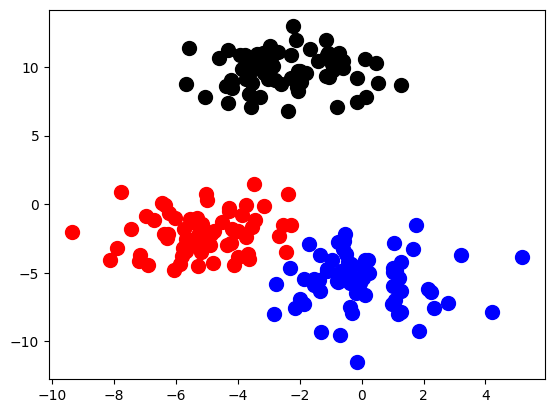

In [6]:
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=3)
# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.show()

####  Hierarchical clustering

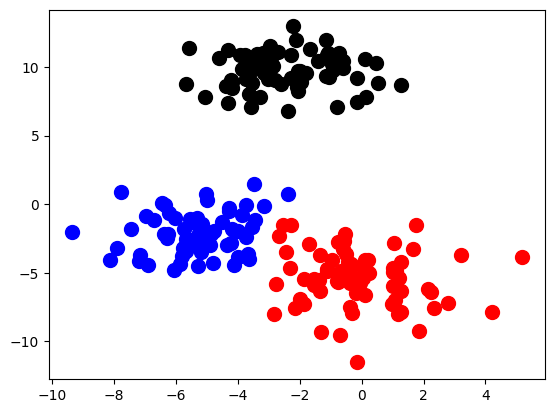

In [7]:
from sklearn.cluster import AgglomerativeClustering

# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)

plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc ==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.show()


#### DBSCAN

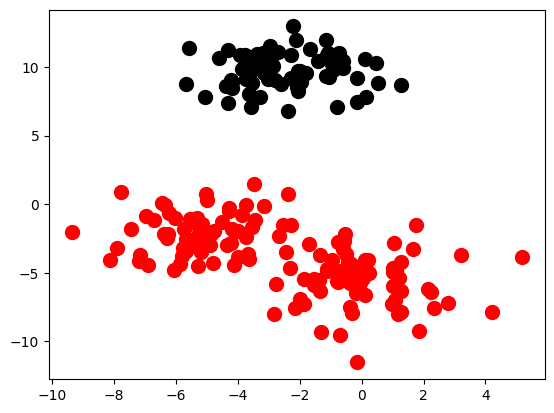

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=5)
y_db = dbscan.fit_predict(points)

plt.scatter(points[y_db ==0,0], points[y_db == 0,1], s=100, c='red')
plt.scatter(points[y_db ==1,0], points[y_db == 1,1], s=100, c='black')
plt.scatter(points[y_db ==-1,0], points[y_db == -1,1], s=100, c='blue')
plt.show()

### Dimensionality Reduction

In [9]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [10]:
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
X.shape

(150, 4)

#### Principal Component Analysis

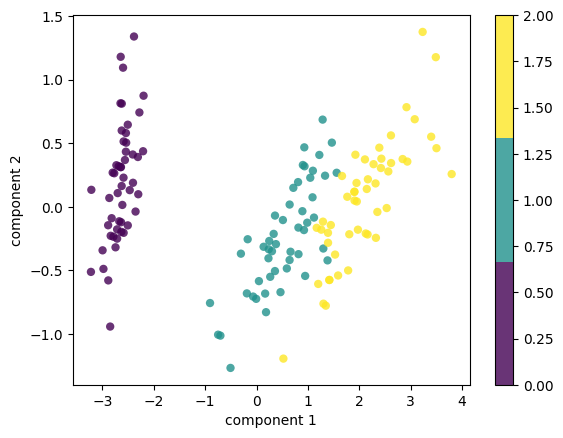

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # we want to reduce to 2 dimensions
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

#### Linear Discriminant Analysis

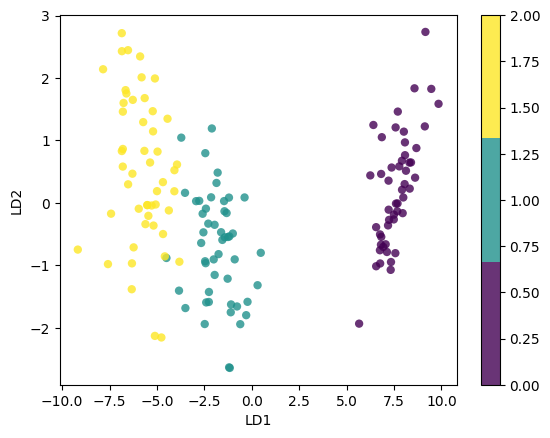

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2) # we want to reduce to 2 dimensions
X_lda = lda.fit_transform(X, y) # note that we also pass the target variable 

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.colorbar()
plt.show()


#### Isometric Feature Mapping

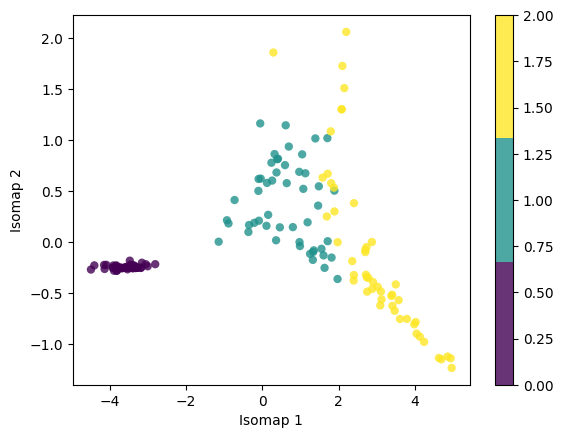

In [14]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
X_iso = iso.fit_transform(X)

plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Isomap 1')
plt.ylabel('Isomap 2')
plt.colorbar()
plt.show()

#### t-Distributed Stochastic Neighbor Embedding

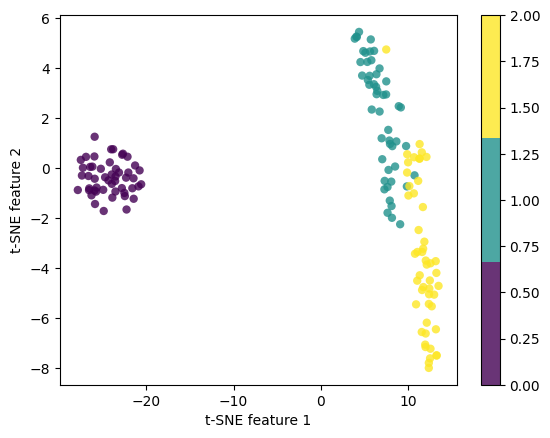

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0) # we want to reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar()
plt.show()